In [2]:
import pandas as pd
import numpy as np


The code below reads in the dataset "arrests.csv" and assigns it to a varriable called crime, displaying the first 5 lines. This dataset is a collection of various arrests made by the City of Pittsburgh Police Department over many years. Each arrest has detailed information about the person arrested as well as the location and the location of the incident. I decided that incident location, more specifically incident neighborhood, was a better statistic than arrest location to assess the level of crime in the area. Arrests are usually only for more severe crimes than noise complaints or other minor offenses, so by sorting the neighborhoods by the number of arrests from incidents within them, a good picture of that neighborhood's safety can be drawn.

In [4]:
crime = pd.read_csv("arrests.csv",index_col="PK")
crime.head()

CCR   AGE GENDER RACE           ARRESTTIME  \
PK                                                         
1975272  16158872  42.0      F    B  2016-08-24T12:20:00   
1974456  16144120  31.0      M    W  2016-08-03T14:55:00   
1974466  16144165  63.0      F    B  2016-08-03T16:45:00   
1974550  16145257  25.0      F    W  2016-08-05T02:36:00   
1974596  16145962  25.0      M    B  2016-08-06T02:00:00   

                                           ARRESTLOCATION  \
PK                                                          
1975272         4700 Block Centre AV Pittsburgh, PA 15213   
1974456  4200 Block Steubenville PKE Pittsburgh, PA 15205   
1974466        900 Block Freeport RD Fox Chapel, PA 15238   
1974550       Foreland ST & Cedar AV Pittsburgh, PA 15212   
1974596         900 Block Woodlow ST Pittsburgh, PA 15205   

                                                  OFFENSES  \
PK                                                           
1975272                                 3929 Retail Theft.   
1974456       13(a)(16) Possession of Controlled Substance   
1974466                                 3929 Retail Theft.   
1974550  5503 Disorderly Conduct. / 5505 Public Drunken...   
1974596  2702 Aggravated Assault. / 2705 Recklessy Enda...   

                                         INCIDENTLOCATION  \
PK                                                          
1975272         4700 Block Centre AV Pittsburgh, PA 15213   
1974456  4200 Block Steubenville PKE Pittsburgh, PA 15205   
1974466        900 Block Freeport RD Fox Chapel, PA 15238   
1974550       Foreland ST & Cedar AV Pittsburgh, PA 15212   
1974596         900 Block Woodlow ST Pittsburgh, PA 15205   

        INCIDENTNEIGHBORHOOD INCIDENTZONE  INCIDENTTRACT  COUNCIL_DISTRICT  \
PK                                                                           
1975272           Bloomfield            5          804.0               8.0   
1974456         Outside City          OSC         5599.0               NaN   
1974466             Westwood            5         2811.0               9.0   
1974550       East Allegheny            1         2304.0               1.0   
1974596      Crafton Heights            5         2814.0               2.0   

         PUBLIC_WORKS_DIVISION          X          Y  
PK                                                    
1975272                    2.0 -79.949277  40.452551  
1974456                    NaN -80.088018  40.440136  
1974466                    2.0 -79.891803  40.486625  
1974550                    1.0 -80.001939  40.454080  
1974596                    5.0 -80.052204  40.445900

The following code snippet creates the actual metric we used. By getting the value counts for unique entries into 'INCIDENTNEIGHBORHOOD', we get the number of arrests in each neighborhood. From there we can divide by the highest count to create a metric that is between 0 and 1. Since we want 1 to be the best score and 0 the worst, we just subtract the metric by 1 and invert the sign to get the final values.

In [7]:
(crime['INCIDENTNEIGHBORHOOD'].value_counts()/2203-1)*(-1)

Central Business District   -0.000000
South Side Flats             0.099864
Carrick                      0.374035
East Allegheny               0.419882
Homewood South               0.467090
                               ...   
Ridgemont                    0.993191
Mt. Oliver Boro              0.994553
Troy Hill-Herrs Island       0.997276
Mt. Oliver Neighborhood      0.999092
South Side Fl                0.999546
Name: INCIDENTNEIGHBORHOOD, Length: 99, dtype: float64

In [3]:
crime['INCIDENTNEIGHBORHOOD'].value_counts()

Central Business District    2203
South Side Flats             1983
Carrick                      1379
East Allegheny               1278
Homewood South               1174
                             ... 
Ridgemont                      15
Mt. Oliver Boro                12
Troy Hill-Herrs Island          6
Mt. Oliver Neighborhood         2
South Side Fl                   1
Name: INCIDENTNEIGHBORHOOD, Length: 99, dtype: int64

In [4]:
crime_metric = (crime['INCIDENTNEIGHBORHOOD'].value_counts()/2203-1)*(-1)
# how to actually create metric

In [15]:
print(crime_metric['Carrick'])
# how to access metric for neighborhoods

0.3740354062641852


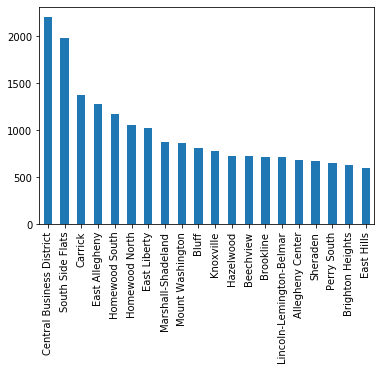

In [14]:
crime['INCIDENTNEIGHBORHOOD'].value_counts().head(20).plot(kind="bar")
# most dangerous neighborhoods (by number of arrests)

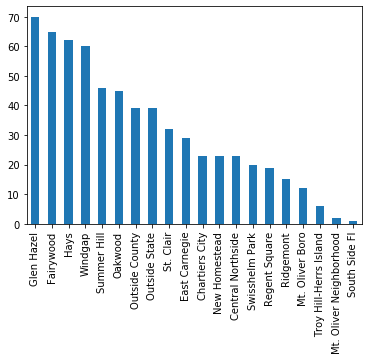

In [13]:
crime['INCIDENTNEIGHBORHOOD'].value_counts().tail(20).plot(kind="bar")
# safest neighborhoods (by number of arrests)